# Health Insurance Cost Analysis and Prediction

## Analyzing factors that influence health insurance premiums

### Import Required Libraries

In [67]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression, Ridge, Lasso
from sklearn.ensemble import RandomForestRegressor
from sklearn.preprocessing import LabelEncoder, PolynomialFeatures
from sklearn import metrics
import warnings
warnings.filterwarnings('ignore')

sns.set_style('whitegrid')
plt.rcParams['figure.dpi'] = 100

### Load and Explore Dataset

In [68]:
df = pd.read_csv('insurance.csv')
print("Dataset Shape:", df.shape)
print("\nFirst few rows:")
df.head()

Dataset Shape: (1338, 7)

First few rows:


,age,sex,bmi,children,smoker,region,charges
0,19,female,27.900,0,yes,southwest,16884.92400
1,18,male,33.770,1,no,southeast,1725.55230
2,28,male,33.000,3,no,southeast,4449.46200
3,33,male,22.705,0,no,northwest,21984.47061
4,32,male,28.880,0,no,northwest,3866.85520


In [69]:
print("Dataset Information:")
df.info()

Dataset Information:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1338 entries, 0 to 1337
Data columns (total 7 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   age       1338 non-null   int64  
 1   sex       1338 non-null   object 
 2   bmi       1338 non-null   float64
 3   children  1338 non-null   int64  
 4   smoker    1338 non-null   object 
 5   region    1338 non-null   object 
 6   charges   1338 non-null   float64
dtypes: float64(2), int64(2), object(3)
memory usage: 73.3+ KB


In [70]:
print("Statistical Summary:")
df.describe()

Statistical Summary:


,age,bmi,children,charges
count,1338.000000,1338.000000,1338.000000,1338.000000
mean,39.207025,30.663397,1.094918,13270.422265
std,14.049960,6.098187,1.205493,12110.011237
min,18.000000,15.960000,0.000000,1121.873900
25%,27.000000,26.296250,0.000000,4740.287150
50%,39.000000,30.400000,1.000000,9382.033000
75%,51.000000,34.693750,2.000000,16639.912515
max,64.000000,53.130000,5.000000,63770.428010


In [71]:
print("Missing Values:")
df.isnull().sum()

Missing Values:


age         0
sex         0
bmi         0
children    0
smoker      0
region      0
charges     0
dtype: int64

## EDA and Visualizations

### Distribution of Insurance Charges

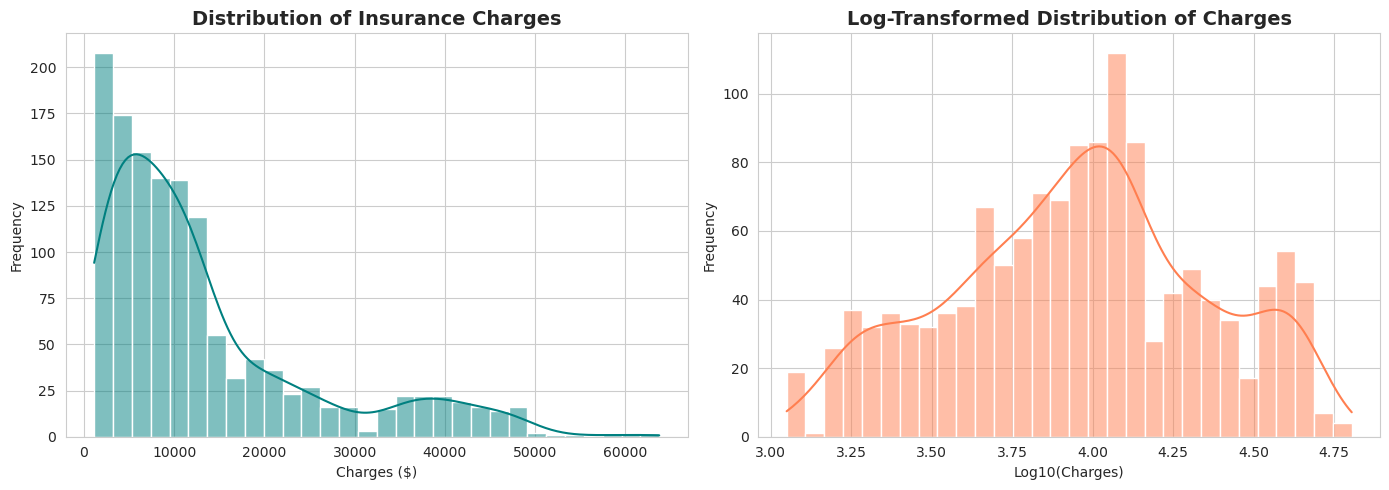

In [72]:
fig, axes = plt.subplots(1, 2, figsize=(14, 5))
sns.histplot(df['charges'], kde=True, color='teal', bins=30, ax=axes[0])
axes[0].set_title('Distribution of Insurance Charges', fontsize=14, weight='bold')
axes[0].set_xlabel('Charges ($)')
axes[0].set_ylabel('Frequency')

sns.histplot(np.log10(df['charges']), kde=True, color='coral', bins=30, ax=axes[1])
axes[1].set_title('Log-Transformed Distribution of Charges', fontsize=14, weight='bold')
axes[1].set_xlabel('Log10(Charges)')
axes[1].set_ylabel('Frequency')
plt.tight_layout()
plt.show()

### Charges by Region

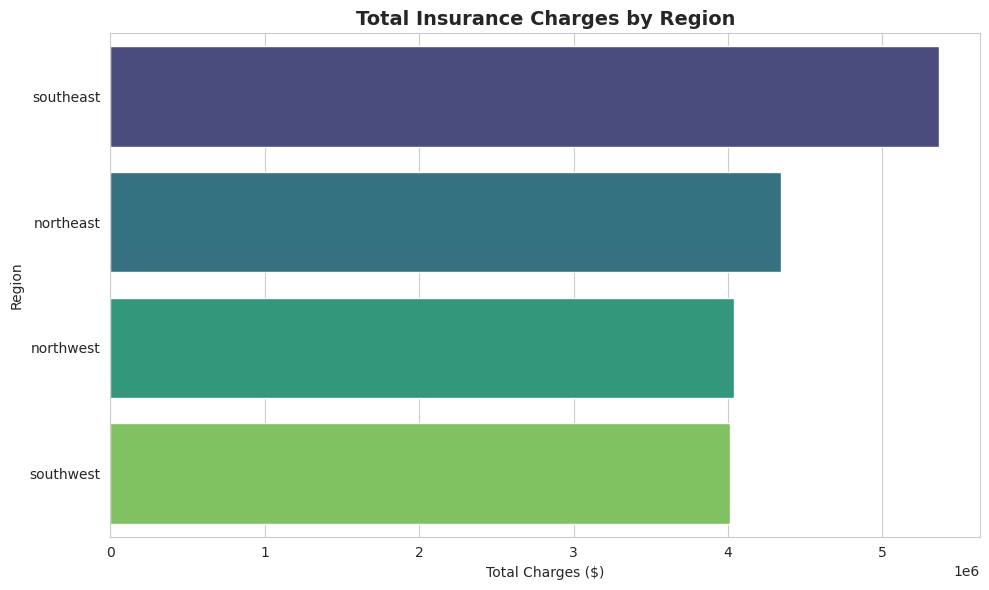

In [73]:
region_charges = df.groupby('region')['charges'].sum().sort_values(ascending=False)
plt.figure(figsize=(10, 6))
sns.barplot(x=region_charges.values, y=region_charges.index, palette='viridis')
plt.title('Total Insurance Charges by Region', fontsize=14, weight='bold')
plt.xlabel('Total Charges ($)')
plt.ylabel('Region')
plt.tight_layout()
plt.show()

So overall the highest medical charges are in the Southeast and the lowest are in the Southwest. Taking into account certain factors (sex, smoking, having children) let's see how it changes by region

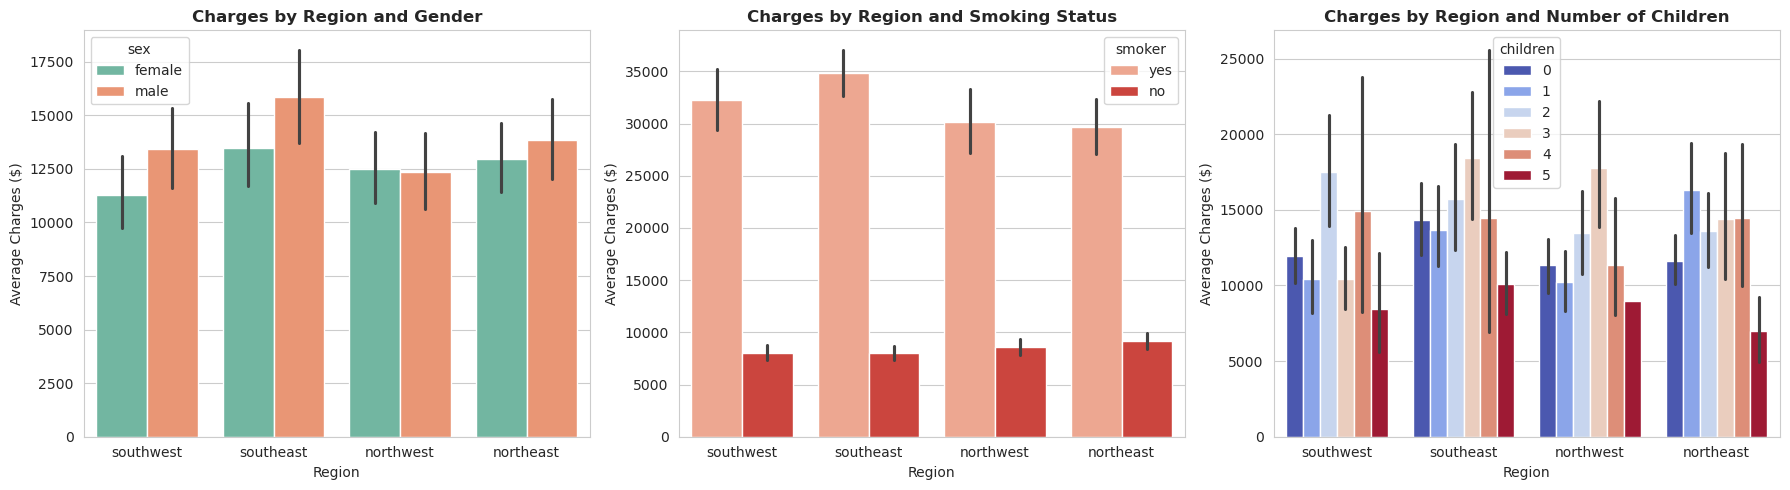

In [74]:
fig, axes = plt.subplots(1, 3, figsize=(18, 5))

sns.barplot(x='region', y='charges', hue='sex', data=df, palette='Set2', ax=axes[0])
axes[0].set_title('Charges by Region and Gender', fontsize=12, weight='bold')
axes[0].set_xlabel('Region')
axes[0].set_ylabel('Average Charges ($)')

sns.barplot(x='region', y='charges', hue='smoker', data=df, palette='Reds', ax=axes[1])
axes[1].set_title('Charges by Region and Smoking Status', fontsize=12, weight='bold')
axes[1].set_xlabel('Region')
axes[1].set_ylabel('Average Charges ($)')

sns.barplot(x='region', y='charges', hue='children', data=df, palette='coolwarm', ax=axes[2])
axes[2].set_title('Charges by Region and Number of Children', fontsize=12, weight='bold')
axes[2].set_xlabel('Region')
axes[2].set_ylabel('Average Charges ($)')

plt.tight_layout()
plt.show()

As we can see from these barplots the highest charges due to smoking are still in the Southeast but the lowest are in the Northeast. People in the Southwest generally smoke more than people in the Northeast, but people in the Northeast have higher charges by gender than in the Southwest and Northwest overall. And people with children tend to have higher medical costs overall as well

Now let's analyze the medical charges by age, bmi and children according to the smoking factor

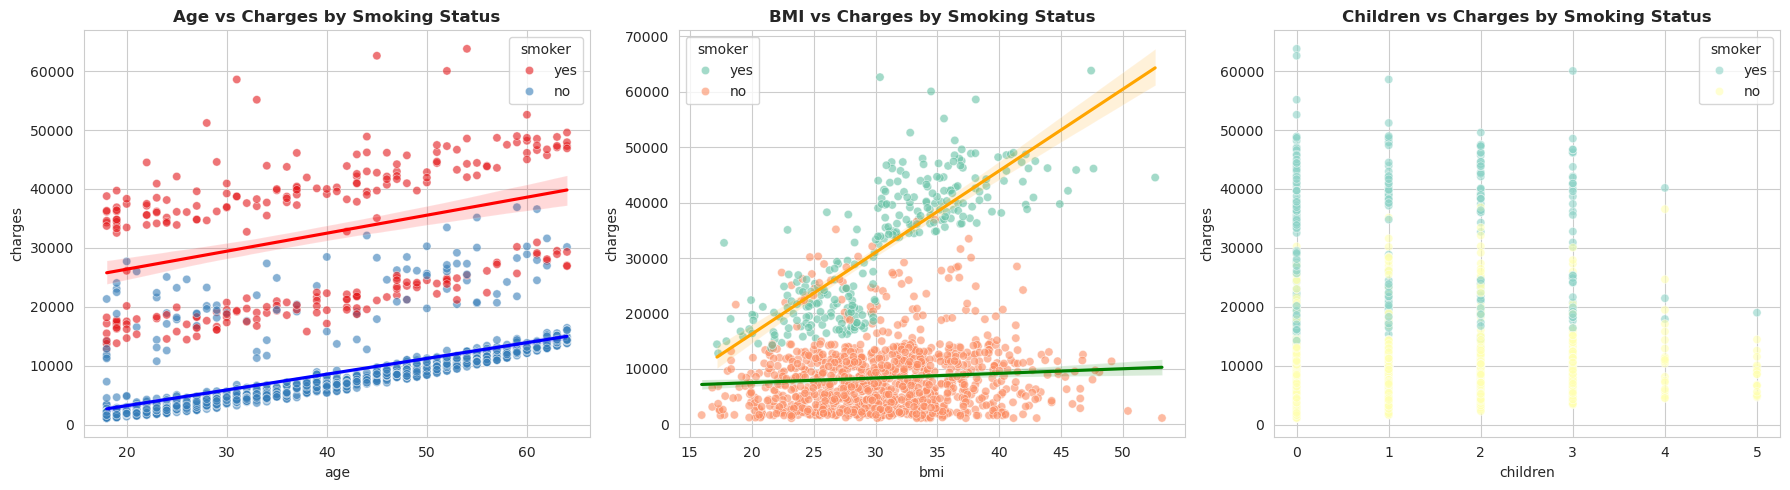

In [75]:
fig, axes = plt.subplots(1, 3, figsize=(18, 5))

sns.scatterplot(data=df, x='age', y='charges', hue='smoker', palette='Set1', alpha=0.6, ax=axes[0])
sns.regplot(data=df[df['smoker']=='yes'], x='age', y='charges', scatter=False, color='red', ax=axes[0])
sns.regplot(data=df[df['smoker']=='no'], x='age', y='charges', scatter=False, color='blue', ax=axes[0])
axes[0].set_title('Age vs Charges by Smoking Status', fontsize=12, weight='bold')

sns.scatterplot(data=df, x='bmi', y='charges', hue='smoker', palette='Set2', alpha=0.6, ax=axes[1])
sns.regplot(data=df[df['smoker']=='yes'], x='bmi', y='charges', scatter=False, color='orange', ax=axes[1])
sns.regplot(data=df[df['smoker']=='no'], x='bmi', y='charges', scatter=False, color='green', ax=axes[1])
axes[1].set_title('BMI vs Charges by Smoking Status', fontsize=12, weight='bold')

sns.scatterplot(data=df, x='children', y='charges', hue='smoker', palette='Set3', alpha=0.6, ax=axes[2])
axes[2].set_title('Children vs Charges by Smoking Status', fontsize=12, weight='bold')

plt.tight_layout()
plt.show()

Smoking has the highest impact on medical costs, even though the costs are growing with age, bmi and children. Also people who have children generally smoke less, which the following violinplots shows too

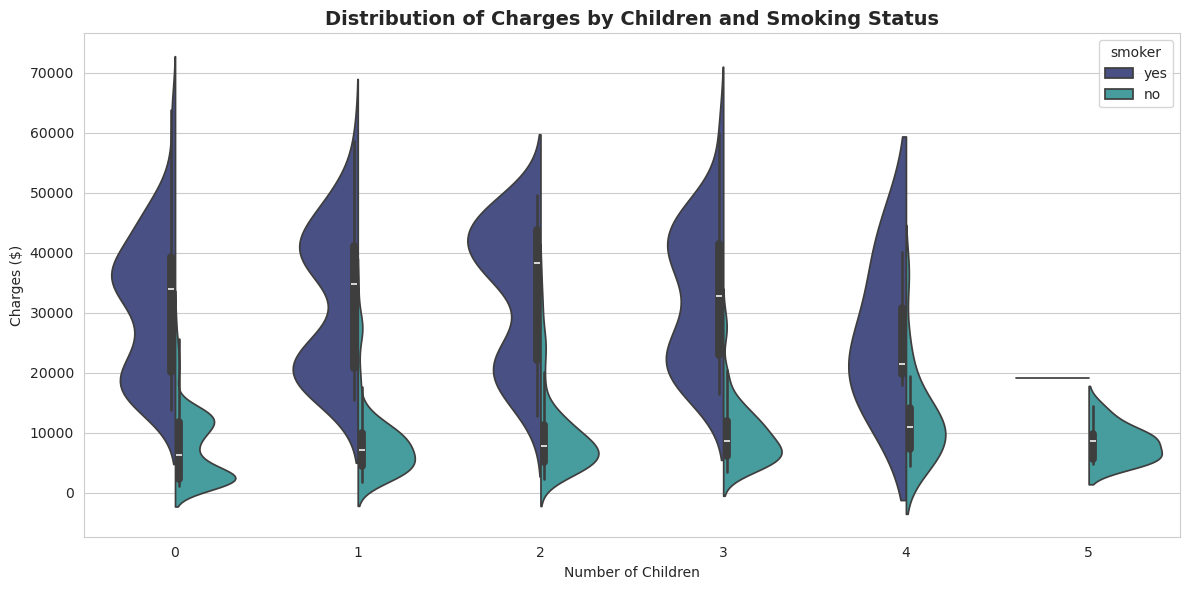

In [76]:
plt.figure(figsize=(12, 6))
sns.violinplot(x='children', y='charges', hue='smoker', data=df, palette='mako', split=True)
plt.title('Distribution of Charges by Children and Smoking Status', fontsize=14, weight='bold')
plt.xlabel('Number of Children')
plt.ylabel('Charges ($)')
plt.tight_layout()
plt.show()

### Encoding Categorical Variables

In [77]:
df_encoded = df.copy()
label_encoder = LabelEncoder()

for column in ['sex', 'smoker', 'region']:
    df_encoded[column] = label_encoder.fit_transform(df_encoded[column])

print("Encoded Data Types:")
df_encoded.dtypes

Encoded Data Types:


age           int64
sex           int64
bmi         float64
children      int64
smoker        int64
region        int64
charges     float64
dtype: object

### Correlation Heatmap

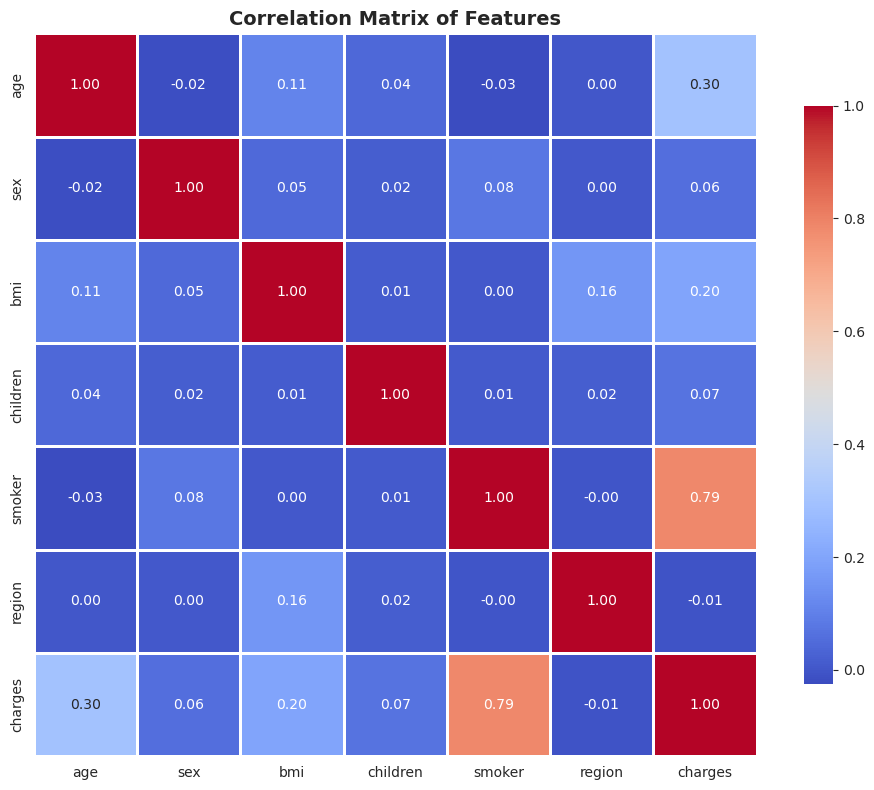

In [78]:
plt.figure(figsize=(10, 8))
correlation_matrix = df_encoded.corr()
sns.heatmap(correlation_matrix, annot=True, fmt='.2f', cmap='coolwarm', 
            square=True, linewidths=1, cbar_kws={"shrink": 0.8})
plt.title('Correlation Matrix of Features', fontsize=14, weight='bold')
plt.tight_layout()
plt.show()

No correlation, except with the smoking

## Model Building

In [79]:
X = df_encoded.drop(['charges'], axis=1)
y = df_encoded['charges']
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

results = {}

### Linear Regression

In [80]:
lin_model = LinearRegression()
lin_model.fit(X_train, y_train)
lin_score = lin_model.score(X_test, y_test)
results['Linear Regression'] = lin_score
print(f"R² Score: {lin_score:.4f}")

R² Score: 0.7833


In [81]:
print('Model Evaluation Metrics:')
print(f"Mean Absolute Error: {metrics.mean_absolute_error(y_test_poly, y_pred_poly):.2f}")
print(f"Mean Squared Error: {metrics.mean_squared_error(y_test_poly, y_pred_poly):.2f}")
print(f"Root Mean Squared Error: {np.sqrt(metrics.mean_squared_error(y_test_poly, y_pred_poly)):.2f}")

Model Evaluation Metrics:
Mean Absolute Error: 2773.57
Mean Squared Error: 20641401.66
Root Mean Squared Error: 4543.28


In [82]:
comparison_df = pd.DataFrame({'Actual': y_test_poly.values, 'Predicted': y_pred_poly})
comparison_df['Difference'] = comparison_df['Actual'] - comparison_df['Predicted']
comparison_df['Percent_Error'] = (abs(comparison_df['Difference']) / comparison_df['Actual'] * 100).round(2)

print("Sample Predictions:")
comparison_df.head(10)

Sample Predictions:


,Actual,Predicted,Difference,Percent_Error
0,9095.06825,9976.728824,-881.660574,9.69
1,5272.17580,6257.835815,-985.660015,18.70
2,29330.98315,34770.544280,-5439.561130,18.55
3,9301.89355,10831.355394,-1529.461844,16.44
4,33750.29180,29477.959952,4272.331848,12.66
5,4536.25900,5637.461846,-1101.202846,24.28
6,2117.33885,2956.671236,-839.332386,39.64
7,14210.53595,15838.021335,-1627.485385,11.45
8,3732.62510,3067.101255,665.523845,17.83
9,10264.44210,12023.003173,-1758.561073,17.13


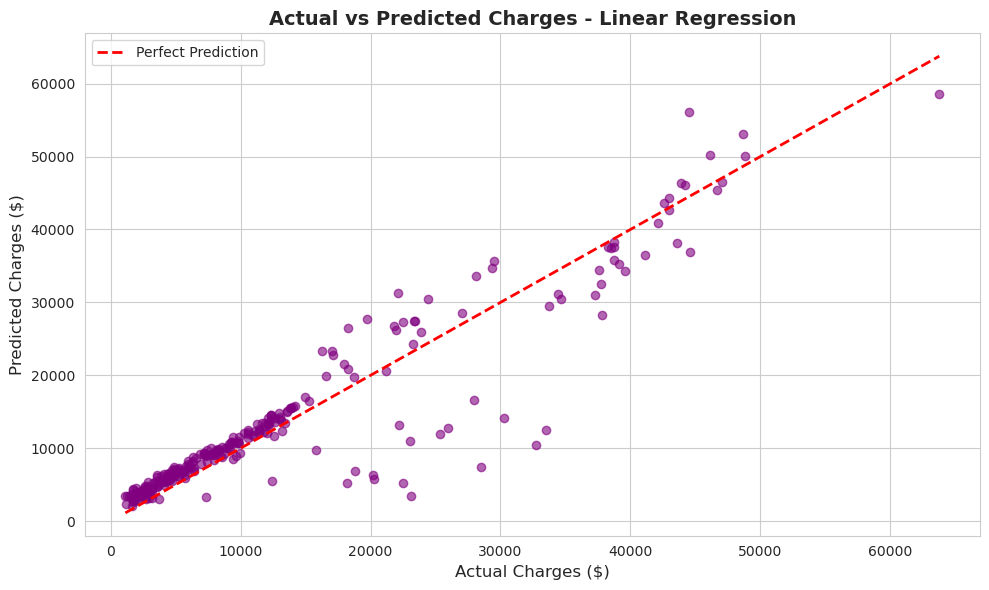

In [83]:
plt.figure(figsize=(10, 6))
plt.scatter(y_test_poly, y_pred_poly, alpha=0.6, color='purple')
plt.plot([y_test_poly.min(), y_test_poly.max()], 
         [y_test_poly.min(), y_test_poly.max()], 
         'r--', linewidth=2, label='Perfect Prediction')
plt.xlabel('Actual Charges ($)', fontsize=12)
plt.ylabel('Predicted Charges ($)', fontsize=12)
plt.title('Actual vs Predicted Charges - Linear Regression', fontsize=14, weight='bold')
plt.legend()
plt.tight_layout()
plt.show()

The result we got is good enough, but we can try to improve it a bit by reducing unimportant features later

### Polynomial Regression

In [84]:
X_poly = df_encoded.drop(['charges', 'sex', 'region'], axis=1)
y_poly = df_encoded['charges']

poly_features = PolynomialFeatures(degree=2, include_bias=False)
X_poly_transformed = poly_features.fit_transform(X_poly)

X_train_poly, X_test_poly, y_train_poly, y_test_poly = train_test_split(
    X_poly_transformed, y_poly, test_size=0.2, random_state=42)

poly_model = LinearRegression()
poly_model.fit(X_train_poly, y_train_poly)
y_pred_poly = poly_model.predict(X_test_poly)

poly_score = poly_model.score(X_test_poly, y_test_poly)
results['Polynomial Regression'] = poly_score

print(f"R² Score: {poly_score:.4f}")

R² Score: 0.8670


Awesome! :)

In [85]:
print('Model Evaluation Metrics:')
print(f"Mean Absolute Error: {metrics.mean_absolute_error(y_test_poly, y_pred_poly):.2f}")
print(f"Mean Squared Error: {metrics.mean_squared_error(y_test_poly, y_pred_poly):.2f}")
print(f"Root Mean Squared Error: {np.sqrt(metrics.mean_squared_error(y_test_poly, y_pred_poly)):.2f}")

Model Evaluation Metrics:
Mean Absolute Error: 2773.57
Mean Squared Error: 20641401.66
Root Mean Squared Error: 4543.28


In [86]:
comparison_df = pd.DataFrame({'Actual': y_test_poly.values, 'Predicted': y_pred_poly})
comparison_df['Difference'] = comparison_df['Actual'] - comparison_df['Predicted']
comparison_df['Percent_Error'] = (abs(comparison_df['Difference']) / comparison_df['Actual'] * 100).round(2)

print("Sample Predictions:")
comparison_df.head(10)

Sample Predictions:


,Actual,Predicted,Difference,Percent_Error
0,9095.06825,9976.728824,-881.660574,9.69
1,5272.17580,6257.835815,-985.660015,18.70
2,29330.98315,34770.544280,-5439.561130,18.55
3,9301.89355,10831.355394,-1529.461844,16.44
4,33750.29180,29477.959952,4272.331848,12.66
5,4536.25900,5637.461846,-1101.202846,24.28
6,2117.33885,2956.671236,-839.332386,39.64
7,14210.53595,15838.021335,-1627.485385,11.45
8,3732.62510,3067.101255,665.523845,17.83
9,10264.44210,12023.003173,-1758.561073,17.13


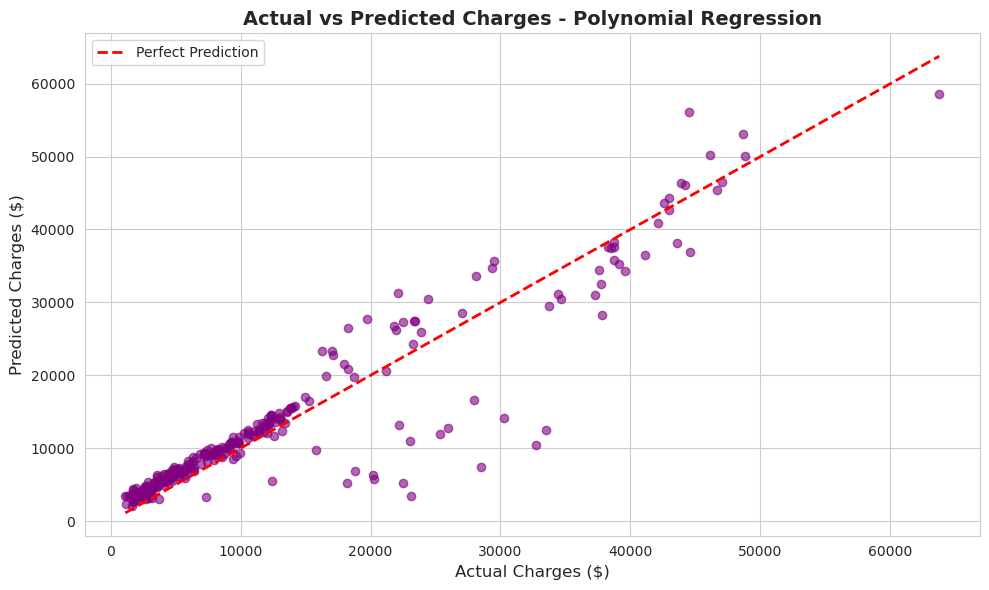

In [87]:
plt.figure(figsize=(10, 6))
plt.scatter(y_test_poly, y_pred_poly, alpha=0.6, color='purple')
plt.plot([y_test_poly.min(), y_test_poly.max()], 
         [y_test_poly.min(), y_test_poly.max()], 
         'r--', linewidth=2, label='Perfect Prediction')
plt.xlabel('Actual Charges ($)', fontsize=12)
plt.ylabel('Predicted Charges ($)', fontsize=12)
plt.title('Actual vs Predicted Charges - Polynomial Regression', fontsize=14, weight='bold')
plt.legend()
plt.tight_layout()
plt.show()

## Model Comparison

In [88]:
print("Model Performance Comparison:")
for model_name, score in sorted(results.items(), key=lambda x: x[1], reverse=True):
    print(f"{model_name}: {score:.4f}")

Model Performance Comparison:
Polynomial Regression: 0.8670
Linear Regression: 0.7833


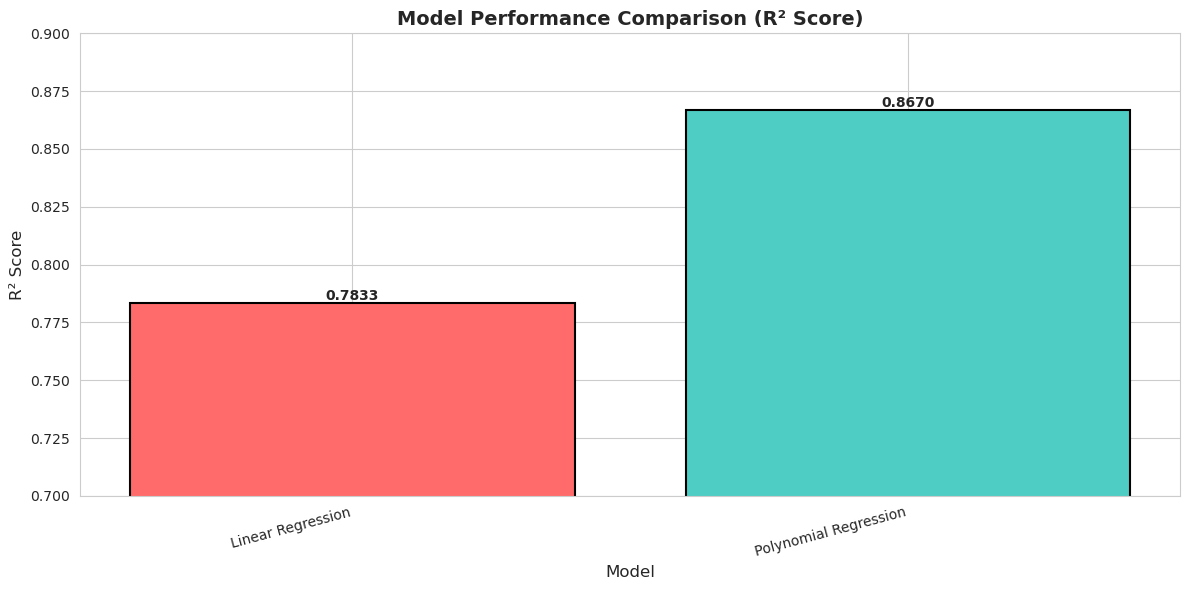

In [89]:
plt.figure(figsize=(12, 6))
models = list(results.keys())
scores = list(results.values())
colors = ['#FF6B6B', '#4ECDC4', '#45B7D1', '#FFA07A', '#98D8C8']
bars = plt.bar(models, scores, color=colors, edgecolor='black', linewidth=1.5)
plt.title('Model Performance Comparison (R² Score)', fontsize=14, weight='bold')
plt.ylabel('R² Score', fontsize=12)
plt.xlabel('Model', fontsize=12)
plt.xticks(rotation=15, ha='right')
plt.ylim([0.7, 0.9])

for bar in bars:
    height = bar.get_height()
    plt.text(bar.get_x() + bar.get_width()/2., height,
             f'{height:.4f}', ha='center', va='bottom', fontsize=10, weight='bold')

plt.tight_layout()
plt.show()

## Conclusion

Like we previously noticed **smoking** is the greatest factor that affects medical cost charges, then it's **bmi** and **age**. **Polynomial Regression** turned out to be the best model

In [90]:
print("Key Findings:")
print("1. Smoking is the most significant factor affecting insurance charges")
print("2. BMI and Age also play important roles in determining costs")
print("3. Polynomial Regression achieved the best performance")
print(f"4. Best Model R² Score: {max(results.values()):.4f}")

Key Findings:
1. Smoking is the most significant factor affecting insurance charges
2. BMI and Age also play important roles in determining costs
3. Polynomial Regression achieved the best performance
4. Best Model R² Score: 0.8670
